In [27]:
import math
import matplotlib
import numpy as np
import pandas as pd

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


%matplotlib inline

stk_path = "C:/Users/Parikshit Ghosh/Downloads/ML models/CAT.csv"
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 30                       
                                
fontsize = 14
ticklabelsize = 14

In [28]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i]))) 
        y_train = np.array(df['adj_close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)      
                                             
                            
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)            
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0])  
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
df = pd.read_csv(stk_path, sep = ",")


df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')


df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month

df.sort_values(by='date', inplace=True, ascending=True)

df.head(10)

,date,open,high,low,close,adj_close,volume,month
0,2011-06-13,96.930000,97.529999,94.720001,95.440002,72.157776,9767400,6
1,2011-06-14,96.849998,98.449997,96.129997,97.860001,73.987419,8479700,6
2,2011-06-15,96.580002,97.360001,95.510002,95.650002,72.316536,8143600,6
3,2011-06-16,95.389999,96.860001,94.209999,95.459999,72.172890,8886500,6
4,2011-06-17,96.459999,96.940002,95.309998,95.949997,72.543373,8314800,6
5,2011-06-20,96.489998,98.370003,96.050003,98.180000,74.229362,7484700,6
6,2011-06-21,99.419998,101.959999,99.059998,101.389999,76.656281,9638100,6
7,2011-06-22,101.169998,102.500000,100.070000,100.150002,75.718781,7445100,6
8,2011-06-23,97.900002,100.650002,96.949997,100.550003,76.021194,10640900,6
9,2011-06-24,101.050003,101.099998,99.440002,100.010002,75.612938,8496400,6


Text(0, 0.5, 'USD')

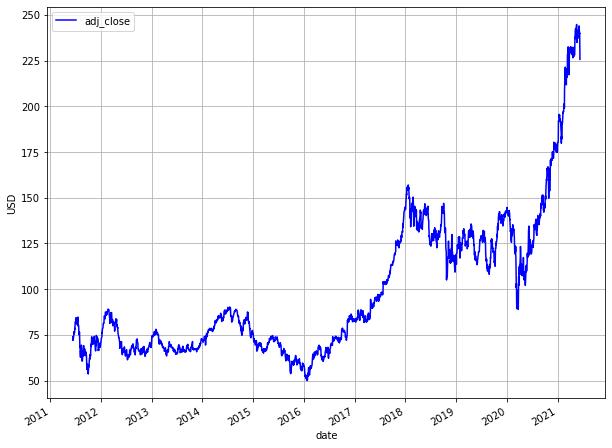

In [30]:

rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [31]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1510
num_cv = 503
num_test = 503
train.shape = (1510, 8)
cv.shape = (503, 8)
train_cv.shape = (2013, 8)
test.shape = (503, 8)


Text(0, 0.5, 'USD')

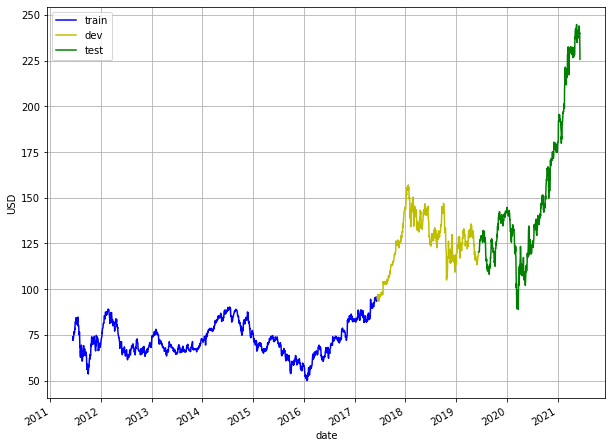

In [32]:

rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [33]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1):
    est_list = get_preds_lin_reg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    R2.append(r2_score(cv['adj_close'], est_list))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

RMSE = [2.2897799576771187, 3.2154748931680897, 2.9176992913126933, 2.793626729379054, 2.7936463778516516, 2.899970457045216, 3.0317440600591503, 3.146785586407871, 3.232753278297765, 3.296806956912636, 3.3571146409119352, 3.4435059498951324, 3.5399089173354095, 3.6408949929701078, 3.7627246388316253, 3.891509429845318, 4.006537382323701, 4.110054302607002, 4.1978000907967985, 4.28030281781329, 4.366593718911965, 4.454268973750952, 4.532680466492075, 4.605442628787781, 4.6817050029594345, 4.761390645047532, 4.840218739415847, 4.9248213524759406, 5.014437473605334, 5.105558738118832]
R2 = [0.9731526070663702, 0.9470574487707577, 0.9564091156847742, 0.9600376173056983, 0.9600370551672176, 0.9569372493645503, 0.9529348236369601, 0.9492952174901723, 0.9464869454634831, 0.9443453244043898, 0.9422905462037674, 0.9392821625504756, 0.9358349118757597, 0.9321217046854251, 0.9275030903430815, 0.9224555367803591, 0.9178035581341244, 0.9135012683290171, 0.9097685108398484, 0.9061868735144359, 0.90

,date,open,high,low,close,adj_close,volume,month,est_N1,est_N2,...,est_N21,est_N22,est_N23,est_N24,est_N25,est_N26,est_N27,est_N28,est_N29,est_N30
1510,2017-06-13,106.180000,106.660004,105.510002,105.750000,95.428093,3522700,6,95.716873,95.852241,...,96.245285,96.255376,96.292939,96.384085,96.432557,96.434176,96.433694,96.276854,96.131680,95.965638
1511,2017-06-14,105.800003,105.989998,103.989998,104.709999,94.489632,4100200,6,95.428093,95.139313,...,96.252245,96.324049,96.340161,96.382154,96.475420,96.527910,96.535193,96.540051,96.393574,96.257141
1512,2017-06-15,103.800003,106.639999,103.800003,106.400002,96.014664,5974100,6,94.489632,93.551171,...,96.184482,96.140059,96.222674,96.251408,96.304058,96.405383,96.467245,96.485052,96.499819,96.367651
1513,2017-06-16,106.760002,107.910004,106.400002,107.599998,97.097519,7350400,6,96.014664,97.539696,...,96.369775,96.346789,96.305639,96.385721,96.414692,96.466774,96.565995,96.627715,96.647137,96.663575
1514,2017-06-19,107.949997,108.040001,106.669998,107.489998,96.998253,4347600,6,97.097519,98.180374,...,96.491553,96.696259,96.668520,96.623644,96.695244,96.718720,96.764983,96.857323,96.914296,96.930911


(2.0, 30.0)

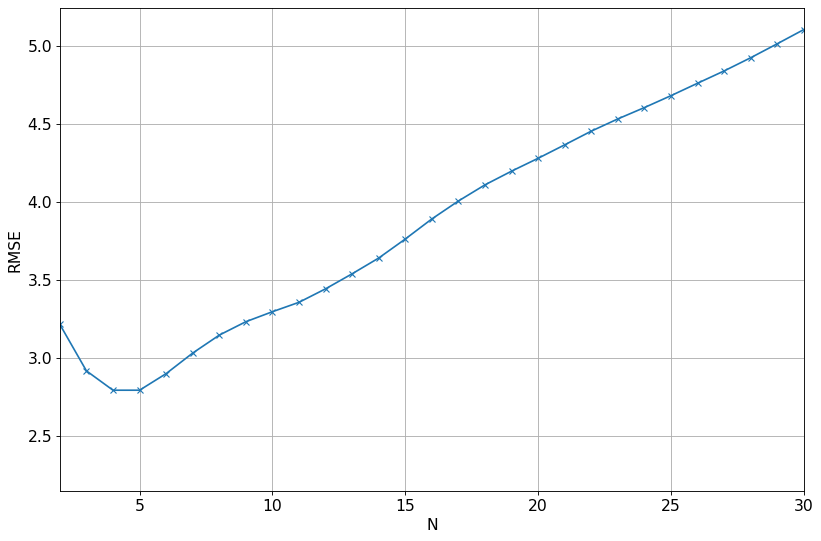

In [34]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 30])

Text(0, 0.5, 'R2')

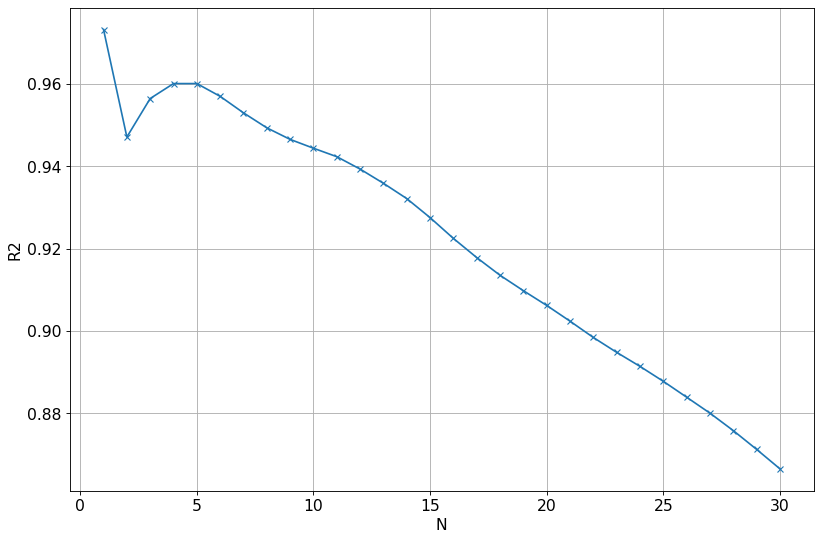

In [35]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')

Text(0, 0.5, 'MAPE')

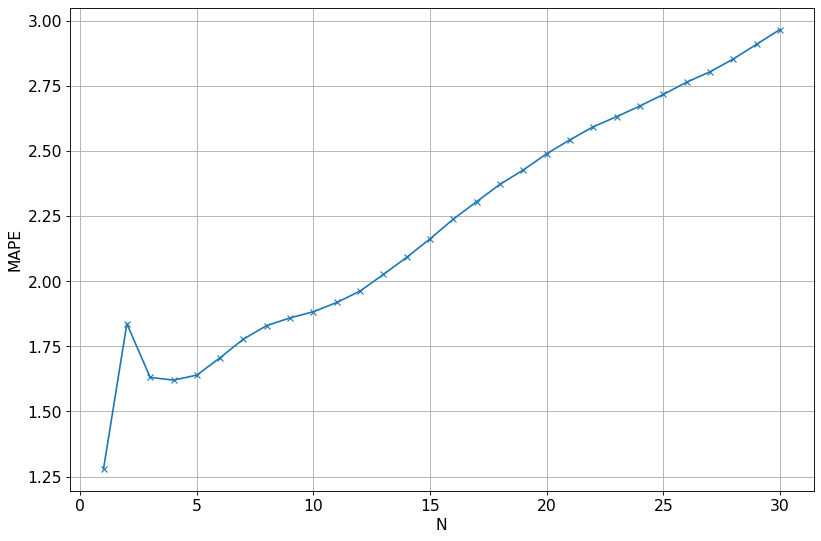

In [36]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')

In [37]:
N_opt = 5

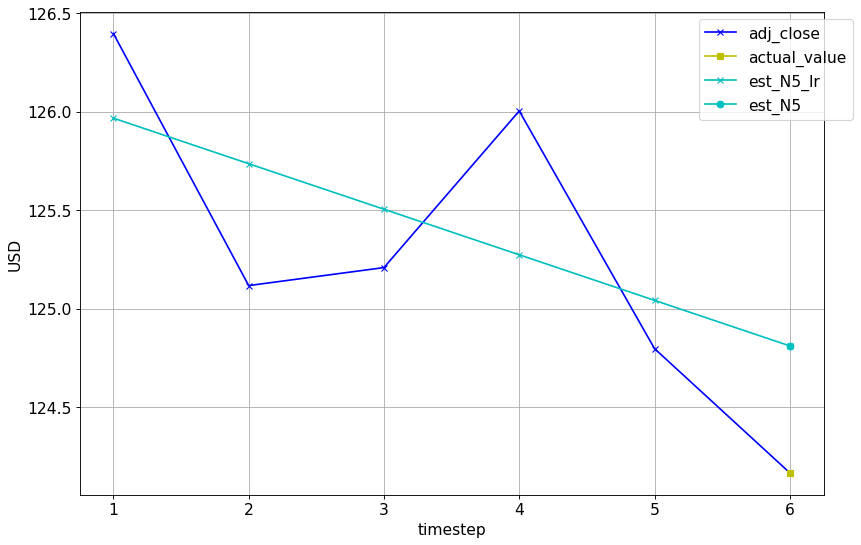

In [38]:
day = pd.Timestamp(date(2017, 10, 31))

Nmax2 = 5

df_temp = cv[cv['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['adj_close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['adj_close'], 'ys-')
legend_list = ['adj_close', 'actual_value']


color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True)
for N in range(5, Nmax2+1):
    X_train = np.array(range(len(df_temp['adj_close'][-N-1:-1])))
    y_train = np.array(df_temp['adj_close'][-N-1:-1])
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            
    y_est = regr.predict(X_train)         
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))
matplotlib.rcParams.update({'font.size': fontsize})

Text(0, 0.5, 'USD')

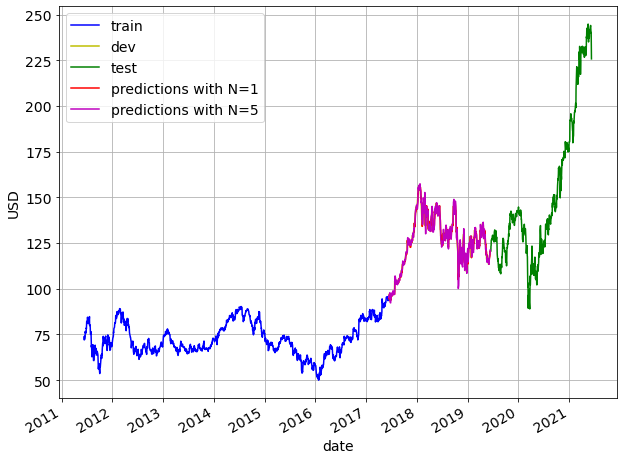

In [39]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

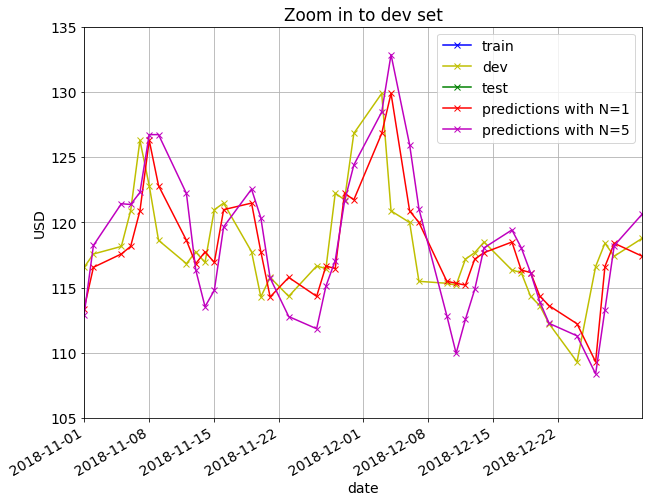

In [40]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2018, 11, 1), date(2018, 12, 31)])
ax.set_ylim([105,135])
ax.set_title('Zoom in to dev set')

In [41]:
est_list = get_preds_lin_reg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("R2 = %0.3f" % r2_score(test['adj_close'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 3.831
R2 = 0.991
MAPE = 1.989%


,date,open,high,low,close,adj_close,volume,month,est_N5
2013,2019-06-13,127.349998,128.399994,126.760002,127.169998,120.365616,3495200,6,121.781562
2014,2019-06-14,126.610001,127.650002,125.500000,127.230003,120.422409,2530100,6,121.514661
2015,2019-06-17,127.209999,128.229996,126.680000,127.320000,120.507591,2607900,6,120.928790
2016,2019-06-18,128.399994,131.350006,128.210007,130.330002,123.356537,4756100,6,120.472577
2017,2019-06-19,130.320007,131.539993,129.869995,130.610001,123.621536,3847200,6,122.867200


Text(0, 0.5, 'USD')

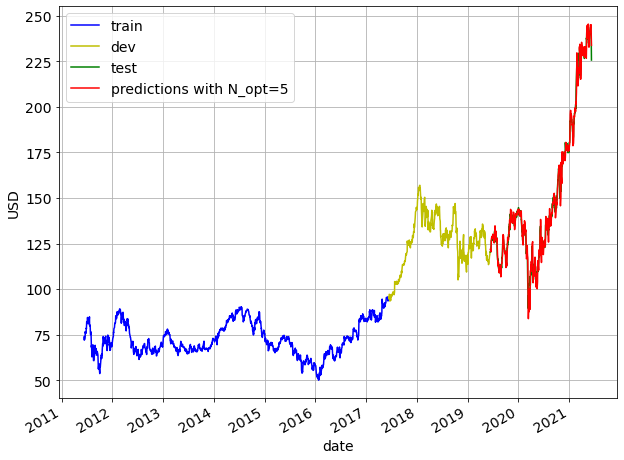

In [42]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

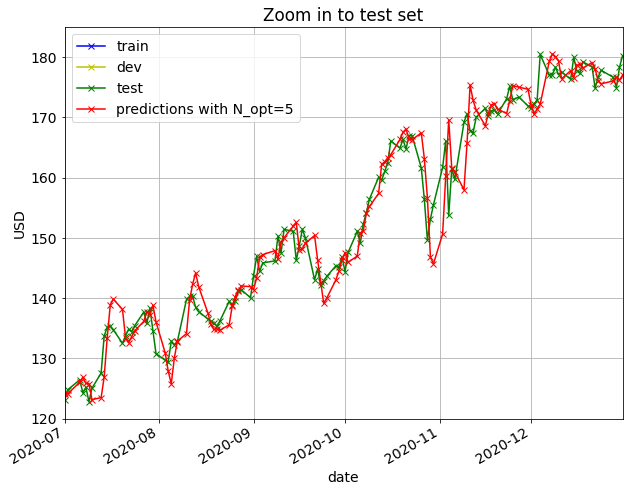

In [43]:
rcParams['figure.figsize'] = 10, 8 

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([120,185])
ax.set_title('Zoom in to test set')

(120.0, 185.0)

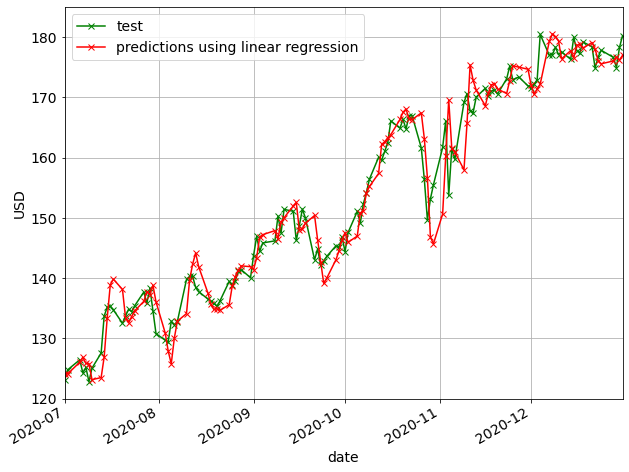

In [44]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using linear regression'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2020, 7, 1), date(2020, 12, 31)])
ax.set_ylim([120,185])

In [45]:
test_lin_reg_CAT = test
test_lin_reg_CAT.to_csv("C:/Users/Parikshit Ghosh/Downloads/ML models/test_lin_reg_CAT.csv")